# **Movie Script Sentiment analysis**

# Install this first

In [ ]:
pip install textblob #for sentiment analysis

# Data Cleaning: removing all the scene cue elements in the script

In [ ]:
def clean_scene_cues(file_name):
    scene_cues = ['FAST DISSOLVE TO:', 'DISSOLVE THROUGH TO:', 'DISSOLVE TO:', 'DISSOLVE:', 'QUICK CUT TO:', 'QUICK', 'CUT TO', 'FADE IN:', 'FADE OUT:', 'FADE IN', 'FADE OUT', 'CUT BACK TO:', 'INT.', 'EXT.', 'SCENE BEGINS TO DISSOLVE SLOWLY TO:', 'THE END', 'SHOT.']  # Add more cues if needed
    cleaned_lines = []

    with open(file_name, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            cleaned_line = line
            for cue in scene_cues:
                cleaned_line = cleaned_line.replace(cue, '')
            cleaned_lines.append(cleaned_line)

    return cleaned_lines

def write_cleaned_content(file_name, cleaned_lines):
    with open(f"cleaned_{file_name}", 'w', encoding='utf-8') as file:
        file.writelines(cleaned_lines)

# Replace 'your_file.txt' with your text file name
script_file = 'you_file.txt'
cleaned_content = clean_scene_cues(script_file)
write_cleaned_content(script_file, cleaned_content)

# Convert .txt to .csv

In [ ]:
scene_cue_list = [
    '- ',
    '(',
    ')',
    'TO',
    'IN',
    'THE',
    'MED.',
    'CLOSE',
    'LONG',
    'MEDIUM',
    'ANGLE',
    "'",
    '!',
    '?',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9'
]

In [ ]:
import csv

def write_to_csv(script_lines):
    with open('movie_script_PSYCHO.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Scene Description', 'Type', 'Content'])

        current_scene = ""
        current_content = ""

        for line in script_lines:
            if line.isupper():  # Check if the line is all uppercase (indicating a scene or character name)
                if current_scene:
                    writer.writerow([current_scene, type_label, current_content])
                    current_content = ""
                current_scene = line.strip()

                # Determine the 'Type' label based on various conditions for scenes
                if " - " in current_scene or any(cue in current_scene for cue in scene_cue_list) or current_scene.endswith('.'):
                    type_label = 'Scene'
                else:
                    type_label = 'Character'

            elif line.strip():  # Check if the line is not empty
                current_content += line.strip() + " "

        # Write the last entry
        if current_scene:
            writer.writerow([current_scene, type_label, current_content])

# Read the script from a file
with open('cleaned_PSYCHO.txt', 'r', encoding='utf-8') as file:
    script_lines = file.readlines()

# Process the script and write to CSV
write_to_csv(script_lines)

# Sentiment Analysis: compound score

In [ ]:
from textblob import TextBlob

def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Using polarity as a compound score

def add_sentiment_scores_to_csv(input_filename, output_filename):
    with open(input_filename, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header

        rows = []
        for row in reader:
            sentiment_score = get_sentiment_score(row[2])  # Assuming 'Content' is in the third column
            row.append(sentiment_score)
            rows.append(row)

    # Write the updated data with sentiment scores to a new CSV
    with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header + ['Sentiment Score'])  # Add the new column header

        for row in rows:
            writer.writerow(row)

# Replace 'your_file.csv' with your CSV file name from the csv converter
input_csv = 'converter.csv'
output_csv = 'MOVIE_NAME.csv' # You can rename the file

# Add sentiment scores to the CSV and save it as a new file
add_sentiment_scores_to_csv(input_csv, output_csv)

# Scores in Python


In [ ]:
def calculate_sentiment_by_type(csv_filename):
    character_scores = {}
    scene_scores = {}

    with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            character = row['Scene Description']
            sentiment_score = float(row['Sentiment Score'])
            type_label = row['Type']

            if type_label == 'Character':
                if character not in character_scores:
                    character_scores[character] = sentiment_score
                else:
                    character_scores[character] += sentiment_score
            else:
                if character not in scene_scores:
                    scene_scores[character] = sentiment_score
                else:
                    scene_scores[character] += sentiment_score

    return character_scores, scene_scores

def display_sentiment_by_type(character_scores, scene_scores):
    sorted_character_scores = sorted(character_scores.items(), key=lambda x: x[0])  # Sort character scores alphabetically by character name
    sorted_scene_scores = sorted(scene_scores.items(), key=lambda x: x[0])  # Sort scene scores alphabetically by scene description

    print("Sentiment Scores for Characters:")
    for character, total_score in sorted_character_scores:
        if total_score != 0.0:  # Exclude scores equal to 0.0
            print(f"{character}: {total_score}")

    print("\nSentiment Scores for Scenes:")
    for scene, total_score in sorted_scene_scores:
        if total_score != 0.0:  # Exclude scores equal to 0.0
            print(f"{scene}: {total_score}")

# Replace 'your_file.csv' with your CSV file name
sentiment_file = 'IT.csv'
character_scores, scene_scores = calculate_sentiment_by_type(sentiment_file)
display_sentiment_by_type(character_scores, scene_scores)

# Scores in Python (This one exclude all compound socres of 0.0/ no value)

In [ ]:
def calculate_sentiment_by_type(csv_filename):
    character_scores = {}
    scene_scores = {}

    with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            character = row['Scene Description']
            sentiment_score = float(row['Sentiment Score'])
            type_label = row['Type']

            # Exclude entries with double spaces
            if '  ' in character:
                continue

            if type_label == 'Character':
                if character not in character_scores:
                    character_scores[character] = sentiment_score
                else:
                    character_scores[character] += sentiment_score
            else:
                if character not in scene_scores:
                    scene_scores[character] = sentiment_score
                else:
                    scene_scores[character] += sentiment_score

    return character_scores, scene_scores

def display_sentiment_by_type(character_scores, scene_scores):
    sorted_character_scores = sorted(character_scores.items(), key=lambda x: x[0])  # Sort character scores alphabetically by character name
    sorted_scene_scores = sorted(scene_scores.items(), key=lambda x: x[0])  # Sort scene scores alphabetically by scene description

    print("Sentiment Scores for Characters:")
    for character, total_score in sorted_character_scores:
        if total_score != 0.0:  # Exclude scores equal to 0.0
            print(f"{character}: {total_score}")

    print("\nSentiment Scores for Scenes:")
    for scene, total_score in sorted_scene_scores:
        if total_score != 0.0:  # Exclude scores equal to 0.0
            print(f"{scene}: {total_score}")

# Replace 'your_file.csv' with your CSV file name
sentiment_file = 'your_file.csv'
character_scores, scene_scores = calculate_sentiment_by_type(sentiment_file)
display_sentiment_by_type(character_scores, scene_scores)

# Visualization

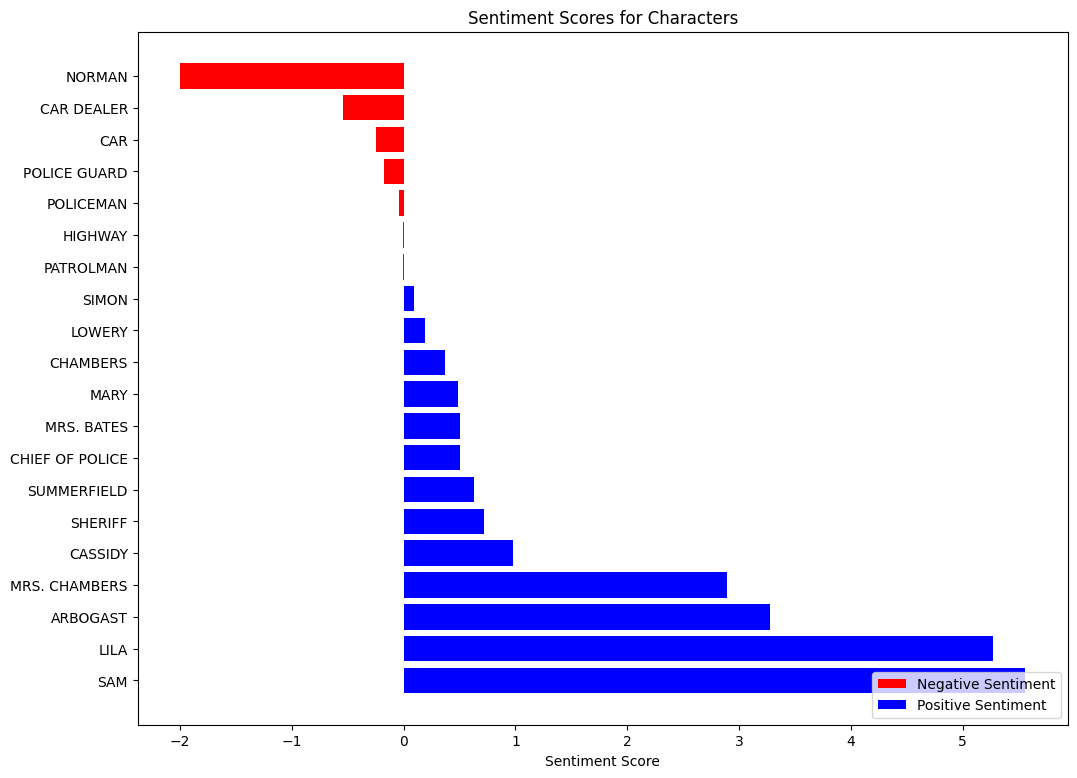

In [ ]:
import matplotlib.pyplot as plt

def visualize_character_sentiment(character_scores):
    filtered_character_scores = {char: score for char, score in character_scores.items() if score != 0.0 and '  ' not in char}
    sorted_character_scores = sorted(filtered_character_scores.items(), key=lambda x: x[1])

    characters = [char[0] for char in sorted_character_scores]
    scores = [score[1] for score in sorted_character_scores]

    colors = ['red' if score < 0 else 'blue' for score in scores]

    plt.figure(figsize=(12, 9)) #Might need to scale up for better view
    bars = plt.barh(characters, scores, color=colors)
    plt.xlabel('Sentiment Score')
    plt.title('Sentiment Scores for Characters')

    # Adding a legend for positive and negative scores
    plt.legend(handles=[bars[0], bars[-1]], labels=['Negative Sentiment', 'Positive Sentiment'], loc='lower right')

    plt.gca().invert_yaxis()
    plt.show()

# Replace 'your_file.csv' with your CSV file name
sentiment_file = 'your_file.csv'
character_scores, _ = calculate_sentiment_by_type(sentiment_file)
visualize_character_sentiment(character_scores)